# Lab Work 2. Statistical data analysis

# TaskSet 6. Birthweight dataset

## Prepare dataset and libs

In [6]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(6)     # set random generator
plt.rcParams['figure.figsize'] = (20, 8)    # set figure size for plot
pd.options.display.float_format = "{:,.3f}".format    # set floating numbers output style

file_path = './Birthweight.csv'
df = pd.read_csv(file_path, index_col='ID')    # read dataset into dataframe
df.describe()


,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000,42.000
mean,51.333,3.313,34.595,39.190,0.524,25.548,9.429,164.452,57.500,28.905,13.667,17.190,180.500,0.143,0.095
std,2.936,0.604,2.400,2.643,0.505,5.666,12.512,6.504,7.198,6.864,2.160,17.308,6.978,0.354,0.297
min,43.000,1.920,30.000,33.000,0.000,18.000,0.000,149.000,45.000,19.000,10.000,0.000,169.000,0.000,0.000
25%,50.000,2.940,33.000,38.000,0.000,20.250,0.000,161.000,52.250,23.000,12.000,0.000,175.250,0.000,0.000
50%,52.000,3.295,34.000,39.500,1.000,24.000,4.500,164.500,57.000,29.500,14.000,18.500,180.500,0.000,0.000
75%,53.000,3.647,36.000,41.000,1.000,29.000,15.750,169.500,62.000,32.000,16.000,25.000,184.750,0.000,0.000
max,58.000,4.570,39.000,45.000,1.000,41.000,50.000,181.000,78.000,46.000,16.000,50.000,200.000,1.000,1.000


## Task 1. Find medium length of children

In [7]:
df['Length'].mean()

51.333333333333336

## Task 2. Check if cigs amount per day is normally distributed

In [12]:
# Normal for every entry in dataframe
# p-value < 0.05, can be rejected
stats.normaltest(df['mnocig'])

NormaltestResult(statistic=14.17450709587283, pvalue=0.000835689397558462)

In [13]:
# Normal for entries who smoke
# p-value > 0.05, cannot reject hypothesis
stats.normaltest(df['mnocig'][df['smoker'] == 1])

NormaltestResult(statistic=4.6688773439793465, pvalue=0.09686484021681536)

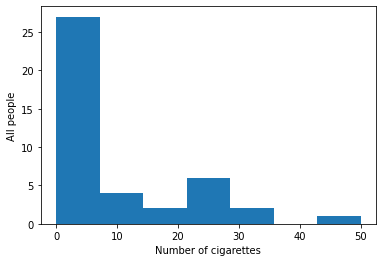

In [25]:
plt.hist(df['mnocig'], bins=7)
plt.xlabel('Number of cigarettes')
plt.ylabel('All people')
plt.show()

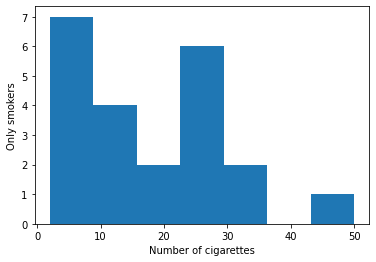

In [26]:
plt.hist(df['mnocig'][df['smoker'] == 1], bins=7)
plt.xlabel('Number of cigarettes')
plt.ylabel('Only smokers')
plt.show()

## Task 3. Check if mothers, age > 35, lighter kids

In [27]:
# p > 0.05, cannot reject, mothers are normally distributed
stats.normaltest(df['mage'])

NormaltestResult(statistic=4.741367469588506, pvalue=0.09341683209873608)

In [28]:
# p > 0.05, cannot reject, birthweight is normally distributed
stats.normaltest(df["Birthweight"])

NormaltestResult(statistic=0.1049044833363354, pvalue=0.9488996378374451)

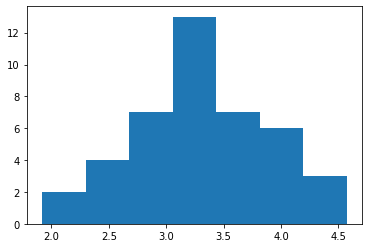

In [29]:
plt.hist(df["Birthweight"], bins=7)   # looks like normal distribution, p value near 1
plt.show()

In [30]:
# Test that older mothers and younger mothers have same expected values
# p value is high, we cannot reject hypothesis
stats.ttest_ind(
    a=df["Birthweight"][df["mage35"] == 1], 
    b=df["Birthweight"][df["mage35"] == 0], 
    alternative="greater"
)

Ttest_indResult(statistic=-0.6931657795371529, pvalue=0.7538945194374619)

## Task 4. Is there correlation between time of gestation and weight of children

In [32]:
# p value > 0.05, cannot reject
stats.normaltest(df["Gestation"])

NormaltestResult(statistic=2.470336463160735, pvalue=0.29078583889150494)

In [35]:
# Birthweight and gestation are normally distributed, we can do Pearson Correlation Test
# Pearson Correlation Coefficient is high, we can say there is correlation 
corr, non_corr = stats.pearsonr(df["Gestation"], df["Birthweight"])
print('Correlation chance:', corr)

Correlation chance: 0.7083028937020828
